# kNN example with bike frame geometries 

### We'll try to classify bicycle types using some information about their frame geometry

General reminders about kNN:

* A type of pattern recognition algorithm 
* Non-parametric 
* A type of **instance-based learning**:
    * Fitting a model is easy (... because there is no model fitting, the data is just held in memory)
    * Model prediction is computationally expensive
* Simple but has been successful in several areas, e.g. handwritten digits

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# We have data on several measurements of bike geometries for 56cm sized bikes 
# (we need to stick with the same size bike across all observations otherwise we'll conflate differences in scale)
bike_geo = pd.read_csv("./data/bike_geometries_56cm.csv")

In [4]:
bike_geo.columns

Index(['Brand', 'Year', 'Model', 'Size', 'Steer Cat', 'Head Angle',
       'Fork Offset', 'Seat Angle', 'Chain Stay', 'Wheelbase', 'Top Tube',
       'BB Drop', 'Trail ', 'Flop'],
      dtype='object')

In [5]:
bike_geo.rename(columns=lambda x: x.strip(), inplace=True)

In [6]:
bike_geo['Steer Cat'].value_counts()

race     104
sport     49
cross     40
tour      18
crit       4
Name: Steer Cat, dtype: int64

In [7]:
bike_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 14 columns):
Brand          436 non-null object
Year           418 non-null object
Model          432 non-null object
Size           425 non-null float64
Steer Cat      215 non-null object
Head Angle     434 non-null float64
Fork Offset    413 non-null float64
Seat Angle     434 non-null float64
Chain Stay     432 non-null float64
Wheelbase      325 non-null object
Top Tube       382 non-null object
BB Drop        215 non-null object
Trail          417 non-null object
Flop           417 non-null object
dtypes: float64(5), object(9)
memory usage: 47.8+ KB


In [8]:
# Create a new dataframe that includes only our modeling columns 

bike_geo_model = bike_geo[['Steer Cat','Head Angle','Fork Offset','Seat Angle','Chain Stay','Wheelbase','Top Tube','BB Drop','Trail',
             'Flop']]

In [9]:
bike_geo_model.shape

(436, 10)

In [10]:
bike_geo_model = bike_geo_model.dropna(subset=['Steer Cat'])

In [11]:
bike_geo_model.shape

(215, 10)

In [12]:
bike_geo_model.head(5)

,Steer Cat,Head Angle,Fork Offset,Seat Angle,Chain Stay,Wheelbase,Top Tube,BB Drop,Trail,Flop
0,crit,74.5,3.00,75.0,39.5,97.00,56.00,6.00,63.16,16.26
1,crit,74.0,3.18,75.0,41.3,99.10,56.00,NaN,64.41,17.07
2,crit,74.0,3.50,74.0,42.0,99.70,55.90,NaN,61.08,16.18
3,crit,74.0,3.80,73.0,43.2,101.30,59.70,NaN,57.96,15.36
4,cross,72.5,5.00,72.5,43.5,13.00,55.70,NaN,54.78,15.71


In [13]:
bike_geo_model.fillna('0.0', inplace=True)

In [14]:
bike_geo_model.head(6)

,Steer Cat,Head Angle,Fork Offset,Seat Angle,Chain Stay,Wheelbase,Top Tube,BB Drop,Trail,Flop
0,crit,74.5,3.00,75.0,39.5,97.00,56.00,6.00,63.16,16.26
1,crit,74.0,3.18,75.0,41.3,99.10,56.00,0.0,64.41,17.07
2,crit,74.0,3.50,74.0,42,99.70,55.90,0.0,61.08,16.18
3,crit,74.0,3.80,73.0,43.2,101.30,59.70,0.0,57.96,15.36
4,cross,72.5,5.00,72.5,43.5,13.00,55.70,0.0,54.78,15.71
5,cross,72.5,5.00,72.5,43.5,13.00,55.70,0.0,54.78,15.71


In [15]:
bike_geo_model = bike_geo_model.loc[(bike_geo_model['Steer Cat'] != 'crit') & (bike_geo_model['Steer Cat'] != 'tour'),:]

In [16]:
bike_geo_model.shape

(193, 10)

In [17]:
bike_geo_model['Steer Cat'].value_counts()

race     104
sport     49
cross     40
Name: Steer Cat, dtype: int64

# kNN classification

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

/Users/larakattan/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/larakattan/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/larakattan/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/larakattan/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [19]:
# create X matrix and y vector from columns 

X = bike_geo_model.drop(columns='Steer Cat')
y = bike_geo_model['Steer Cat']
print(X.shape , y.shape)

(193, 9) (193,)


In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 4 to 196
Data columns (total 9 columns):
Head Angle     193 non-null float64
Fork Offset    193 non-null float64
Seat Angle     193 non-null float64
Chain Stay     193 non-null object
Wheelbase      193 non-null object
Top Tube       193 non-null object
BB Drop        193 non-null object
Trail          193 non-null object
Flop           193 non-null object
dtypes: float64(3), object(6)
memory usage: 15.1+ KB


In [21]:
# I had done other testing and found out .astype() wasn't working because of a ' '
# Replace the ' ' in Wheelbase with 0.0 so we can cast to numeric 

X.loc[X['Wheelbase'] == ' ', 'Wheelbase'] = 0.0
X[(X['Wheelbase']==' ')]

,Head Angle,Fork Offset,Seat Angle,Chain Stay,Wheelbase,Top Tube,BB Drop,Trail,Flop


In [22]:
X = X.astype(float)

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 4 to 196
Data columns (total 9 columns):
Head Angle     193 non-null float64
Fork Offset    193 non-null float64
Seat Angle     193 non-null float64
Chain Stay     193 non-null float64
Wheelbase      193 non-null float64
Top Tube       193 non-null float64
BB Drop        193 non-null float64
Trail          193 non-null float64
Flop           193 non-null float64
dtypes: float64(9)
memory usage: 15.1 KB


## kNN with train and test on same dataset

In [24]:
# train kNN on full dataset (DON'T ever do this!) and check results 

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)

print(metrics.accuracy_score(y, y_pred))

0.9222797927461139


## kNN with train/test split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# fit on train
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# test on test
y_pred = knn.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.8448275862068966


In [26]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[ 5,  7,  0],
       [ 2, 29,  0],
       [ 0,  0, 15]])

## kNN with cross-validation: for model tuning

* What value of k gives us the best kNN model?

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
# 10-fold cross-validation with K=7 for kNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=7)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[0.8        0.85       0.8        0.7        0.84210526 0.94736842
 0.89473684 0.68421053 0.78947368 0.61111111]


In [29]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.7919005847953218


In [30]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.8532163742690058, 0.8310233918128654, 0.8209941520467836, 0.8060233918128654, 0.7746491228070175, 0.7802046783625731, 0.7919005847953218, 0.8024269005847954, 0.7758187134502924, 0.786345029239766, 0.7810818713450292, 0.786345029239766, 0.7810818713450292, 0.7810818713450292, 0.7810818713450292, 0.758859649122807, 0.7535964912280702, 0.7535964912280702, 0.7430701754385964, 0.7430701754385964, 0.7430701754385964, 0.7486257309941521, 0.7652923976608187, 0.7652923976608187, 0.7652923976608187, 0.7652923976608187, 0.7600292397660818, 0.7600292397660818, 0.7600292397660818, 0.7600292397660818]


Text(0,0.5,'Cross-Validated Accuracy')

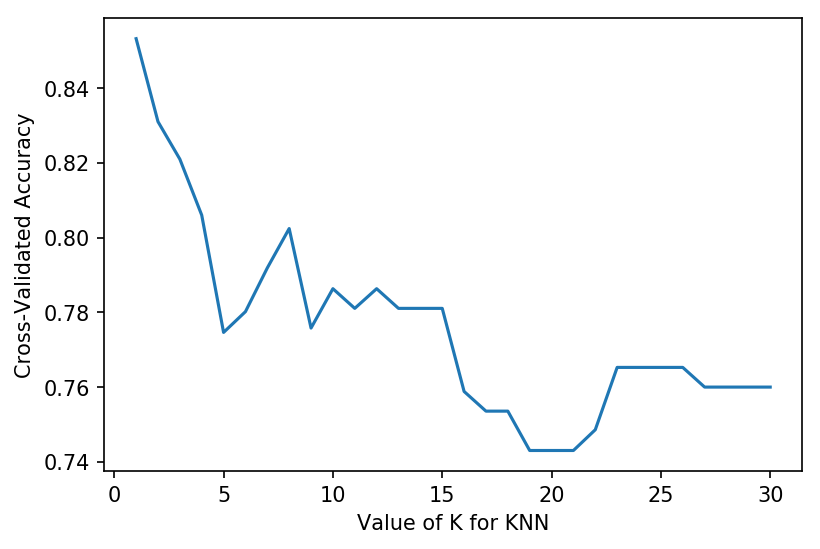

In [31]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.figure(dpi=150)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

Text(0,0.5,'Cross-Validated Accuracy')

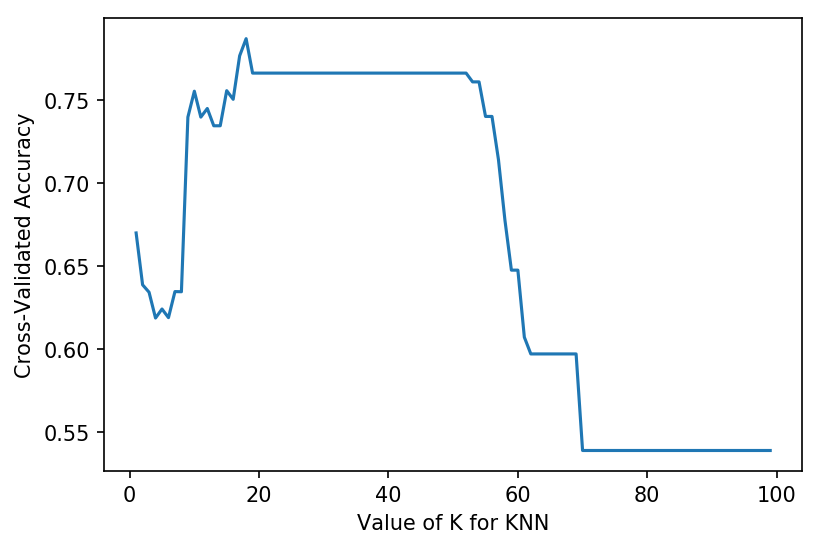

In [32]:
# now try with k-fold = 3 (cv parameter)

k_range = list(range(1, 100))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=3, scoring='accuracy')
    k_scores.append(scores.mean())

plt.figure(dpi=150)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

## kNN with cross-validation: for model selection

We know our optimal value of k, but let's use cross-validation to see how kNN compares against a logistic regression for model selection

In [33]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=2)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.8310233918128654


In [35]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.9139181286549707


## Parameter tuning using `GridSearchCV`

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
# define the parameter values that should be searched
k_range = list(range(1, 100))

In [38]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]}


In [39]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [40]:
# fit the grid with data
grid.fit(X, y);

In [41]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# view the complete results (list of named tuples)
grid.grid_scores_

[mean: 0.85492, std: 0.09776, params: {'n_neighbors': 1},
 mean: 0.83420, std: 0.13877, params: {'n_neighbors': 2},
 mean: 0.82383, std: 0.16700, params: {'n_neighbors': 3},
 mean: 0.80829, std: 0.13979, params: {'n_neighbors': 4},
 mean: 0.77720, std: 0.15843, params: {'n_neighbors': 5},
 mean: 0.78238, std: 0.14114, params: {'n_neighbors': 6},
 mean: 0.79275, std: 0.09670, params: {'n_neighbors': 7},
 mean: 0.80311, std: 0.10147, params: {'n_neighbors': 8},
 mean: 0.77720, std: 0.10228, params: {'n_neighbors': 9},
 mean: 0.78756, std: 0.10838, params: {'n_neighbors': 10},
 mean: 0.78238, std: 0.09872, params: {'n_neighbors': 11},
 mean: 0.78756, std: 0.10041, params: {'n_neighbors': 12},
 mean: 0.78238, std: 0.09294, params: {'n_neighbors': 13},
 mean: 0.78238, std: 0.09294, params: {'n_neighbors': 14},
 mean: 0.78238, std: 0.09294, params: {'n_neighbors': 15},
 mean: 0.76166, std: 0.15200, params: {'n_neighbors': 16},
 mean: 0.75648, std: 0.14993, params: {'n_neighbors': 17},
 mean:

In [42]:
# examine the first tuple
print(grid.grid_scores_[0].parameters)
print(grid.grid_scores_[0].cv_validation_scores)
print(grid.grid_scores_[0].mean_validation_score)

{'n_neighbors': 1}
[0.8        0.85       1.         0.85       0.89473684 0.94736842
 0.84210526 0.84210526 0.89473684 0.61111111]
0.8549222797927462


In [43]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8549222797927462
{'n_neighbors': 1}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


## Reducing computational expense using `RandomizedSearchCV`

In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
# specify "parameter distributions" rather than a "parameter grid"

k_range = list(range(1, 100))

param_dist = dict(n_neighbors=k_range, weights=['uniform','distance'])

In [64]:
# n_iter controls the number of searches -- that is, how much of the potential grid do we search
# n_iter default = 10
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', \
                          n_iter=40)
rand.fit(X, y);


In [65]:
# examine the best model
print(rand.best_score_)
print(rand.best_params_)

0.8549222797927462
{'weights': 'distance', 'n_neighbors': 2}


In [66]:
# run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
best_scores = []
for _ in range(20):
    rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10)
    rand.fit(X, y)
    best_scores.append(round(rand.best_score_, 3))
print(best_scores)

[0.834, 0.793, 0.839, 0.819, 0.793, 0.819, 0.834, 0.824, 0.808, 0.793, 0.824, 0.793, 0.829, 0.855, 0.855, 0.788, 0.813, 0.834, 0.824, 0.824]
